In [ ]:
# import packages that are needed

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [ ]:
# load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Reshape loaded model
x_train = x_train.reshape((60000, 28, 28, 1)) / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)) / 255.0

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
# use imageData generator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)

In [ ]:
# create model structure
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# augment images for training
datagen.fit(x_train)
augmented_images = []
for batch in datagen.flow(x_train, batch_size=len(x_train), shuffle=False):
    augmented_images.append(batch)
    if len(augmented_images) * len(batch) >= len(x_train) * 2:
        break
augmented_images = np.concatenate(augmented_images)
y_train_augmented = np.concatenate((y_train, y_train), axis=0)

Number of images with augmentation:  120000


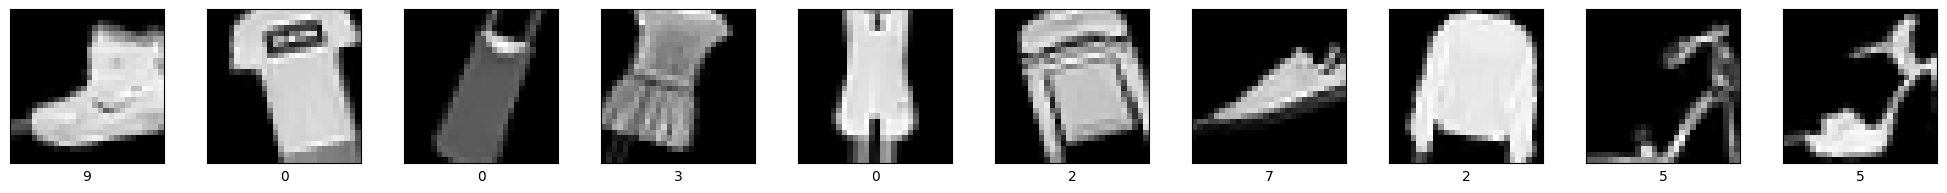

In [ ]:
#print augmentation images
fig = plt.figure(figsize=(25, 2))
print("Number of images with augmentation: ",augmented_images.shape[0])
for i, image in enumerate(augmented_images[:10]):
    # Create a new subplot for each image
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap='gray')
    plt.xlabel(np.argmax(y_train_augmented[i]))

plt.show()

Number of images without augmentation:  60000


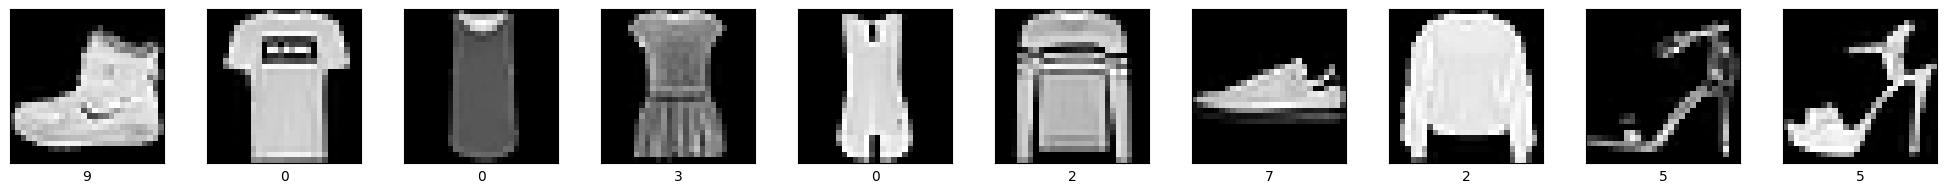

In [ ]:
#print original images
fig = plt.figure(figsize=(25, 2))
print("Number of images without augmentation: ",x_train.shape[0])
for i, image in enumerate(x_train[:10]):
    # Create a new subplot for each image
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap='gray')
    plt.xlabel(np.argmax(y_train[i]))

plt.show()

In [ ]:
# fit normal test data and show accuracy before augmented data
model.fit(x_train, y_train, epochs=50, batch_size=128, verbose = 2)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(x_train.shape)
print('Test accuracy before augmentation :', test_acc)

Epoch 1/50
469/469 - 4s - loss: 0.5673 - accuracy: 0.8029 - 4s/epoch - 8ms/step
Epoch 2/50
469/469 - 2s - loss: 0.3963 - accuracy: 0.8593 - 2s/epoch - 4ms/step
Epoch 3/50
469/469 - 2s - loss: 0.3509 - accuracy: 0.8726 - 2s/epoch - 4ms/step
Epoch 4/50
469/469 - 2s - loss: 0.3256 - accuracy: 0.8813 - 2s/epoch - 4ms/step
Epoch 5/50
469/469 - 2s - loss: 0.3100 - accuracy: 0.8863 - 2s/epoch - 4ms/step
Epoch 6/50
469/469 - 3s - loss: 0.2936 - accuracy: 0.8907 - 3s/epoch - 5ms/step
Epoch 7/50
469/469 - 2s - loss: 0.2772 - accuracy: 0.8967 - 2s/epoch - 5ms/step
Epoch 8/50
469/469 - 2s - loss: 0.2701 - accuracy: 0.9000 - 2s/epoch - 4ms/step
Epoch 9/50
469/469 - 2s - loss: 0.2597 - accuracy: 0.9029 - 2s/epoch - 4ms/step
Epoch 10/50
469/469 - 2s - loss: 0.2514 - accuracy: 0.9066 - 2s/epoch - 4ms/step
Epoch 11/50
469/469 - 2s - loss: 0.2462 - accuracy: 0.9079 - 2s/epoch - 4ms/step
Epoch 12/50
469/469 - 3s - loss: 0.2365 - accuracy: 0.9117 - 3s/epoch - 5ms/step
Epoch 13/50
469/469 - 3s - loss: 0.23

In [ ]:
# fit the model
history = model.fit(
    augmented_images, y_train_augmented,
    validation_data=(x_test, y_test),
    epochs=50, batch_size=128
)

Epoch 1/50
938/938 [==============================] - 7s 8ms/step - loss: 0.3642 - accuracy: 0.8591 - val_loss: 0.4449 - val_accuracy: 0.8513
Epoch 2/50
938/938 [==============================] - 6s 6ms/step - loss: 0.3583 - accuracy: 0.8605 - val_loss: 0.4538 - val_accuracy: 0.8457
Epoch 3/50
938/938 [==============================] - 5s 5ms/step - loss: 0.3536 - accuracy: 0.8628 - val_loss: 0.4531 - val_accuracy: 0.8484
Epoch 4/50
938/938 [==============================] - 5s 6ms/step - loss: 0.3484 - accuracy: 0.8641 - val_loss: 0.4295 - val_accuracy: 0.8462
Epoch 5/50
938/938 [==============================] - 5s 6ms/step - loss: 0.3450 - accuracy: 0.8660 - val_loss: 0.4584 - val_accuracy: 0.8443
Epoch 6/50
938/938 [==============================] - 5s 5ms/step - loss: 0.3402 - accuracy: 0.8672 - val_loss: 0.4707 - val_accuracy: 0.8441
Epoch 7/50
938/938 [==============================] - 6s 6ms/step - loss: 0.3361 - accuracy: 0.8691 - val_loss: 0.4753 - val_accuracy: 0.8411
Epoch 

In [ ]:
# evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(augmented_images.shape)
print('Test accuracy after augmentation:', test_acc)

313/313 - 0s - loss: 0.7397 - accuracy: 0.8336 - 490ms/epoch - 2ms/step
(120000, 28, 28, 1)
Test accuracy after augmentation: 0.8335999846458435


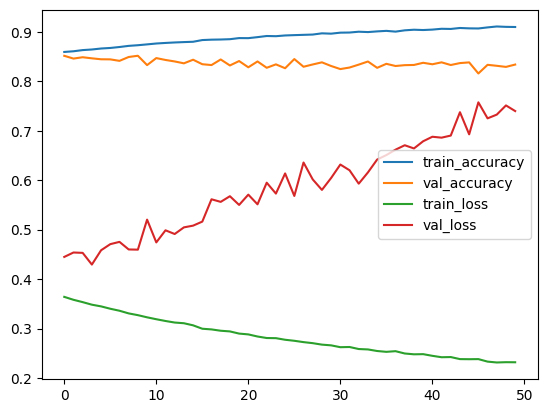

In [ ]:
# plot accuracy and loss
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()